#  Projeto 4 - Foramção Analísta de Dados (DSA)
## Projeto de Análise de Dados com Linguagem Python
### Técnicas de Análise Exploratoria e Interpretação de Gráficos Estatísticos 

Este projeto trabalhará com dados de contabilidade, realizando análise exploratória antes e depois da limpeza de dados, realização de tratamento de valores ausentes com diferentes técnicas, tratamento de outliers para então darmos ênfase na interpretação dos gráficos estatísticos. Quando mais trática, mais aprendizado.

O objetivo deste projeto é detectar eventuais problemas nos dados, revolvê-los e então analisar o comportamento de algumas variáveis, o que será feito interpretando os gráficos.

Os dados são fictícios, mas a definição das variáveis representa informação real da área de contabilidade.

## Dicionário de Dados

- id: Identificador único para cada lançamento.
- data_lancamento: A data em que o lançamento contável está sem feito.
- conta_debito: Conta Contábil a ser debitáda.
- conta_credito: Conta Contábil a ser creditada.
- valor: Valor monetário do lançamento.
- documento: Documentação comprobatória da operação.
- natureza_operacao: Descrição do evento contábel.
- centro_custo: Setor ou departamento responsável pela operação.
- impostos: Impostos e tributos envolvidos, se aplicável.
- moeda: Moeda utilizada na operação, se aplicável.
- taxa_conversao: Taxa de conversão para a moeda nacional, se aplicável.
 

## Pacotes Python Usados neste Projeto

In [2]:
!python.exe -m pip install --upgrade pip

In [3]:
!pip install -q -U watermark

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
%reload_ext watermark
%watermark -a "Leonardo da Silva Neves"

Author: Leonardo da Silva Neves



## Carregando os Dados

In [5]:
# Carregando o arquivo de uma subpasta
csv = 'Cap07/dataset.csv'

In [6]:
# Carregando o dataset e atribindo a variável df
df = pd.read_csv(csv)

In [7]:
# Shape
df.shape

(1200, 11)

In [8]:
# Amostra
df.head()

,id,data_lancamento,conta_debito,conta_credito,valor,documento,natureza_operacao,centro_custo,impostos,moeda,taxa_conversao
0,1,2022-02-27,DWAVRL,CIOVQ6,5533.25,DOCPAXGQ,OP7JDVK,CC5FYA2,444.13252,NaN,3.475606
1,2,2022-05-11,D8TF53,CV9Y0V,7180.37,DOCBXZXG,OPXSY64,CCLH4R9,471.09236,EUR,3.523287
2,3,2020-03-23,D0TZCE,CELQSH,6067.36,DOCF5ITC,OPTDE9B,CCDG8CJ,326.49988,JPY,3.523287
3,4,2021-06-14,DOGLK7,CDFEMS,5494.34,DOCZRS1U,NaN,CC98G2K,471.09236,JPY,3.523287
4,5,2022-11-13,DHL0I5,CRU97G,4294.18,NaN,OP62LG1,CCZD80Y,154.26398,EUR,3.523287


In [9]:
# Colunas
df.columns

Index(['id', 'data_lancamento', 'conta_debito', 'conta_credito', 'valor',
       'documento', 'natureza_operacao', 'centro_custo', 'impostos', 'moeda',
       'taxa_conversao'],
      dtype='object')

## Análise Exploratória Antes da limpeza

In [10]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1200 non-null   int64  
 1   data_lancamento    1200 non-null   object 
 2   conta_debito       1200 non-null   object 
 3   conta_credito      1200 non-null   object 
 4   valor              1200 non-null   float64
 5   documento          1078 non-null   object 
 6   natureza_operacao  1080 non-null   object 
 7   centro_custo       1200 non-null   object 
 8   impostos           1020 non-null   float64
 9   moeda              947 non-null    object 
 10  taxa_conversao     982 non-null    float64
dtypes: float64(3), int64(1), object(7)
memory usage: 103.3+ KB


In [11]:
# Há valores ausentes? Sim (False) ou Não (True)? 
df.isna().any()

id                   False
data_lancamento      False
conta_debito         False
conta_credito        False
valor                False
documento             True
natureza_operacao     True
centro_custo         False
impostos              True
moeda                 True
taxa_conversao        True
dtype: bool

In [12]:
# Há valores ausentes? Quantos?
df.isna().sum()

id                     0
data_lancamento        0
conta_debito           0
conta_credito          0
valor                  0
documento            122
natureza_operacao    120
centro_custo           0
impostos             180
moeda                253
taxa_conversao       218
dtype: int64

In [13]:
# Calculando a soma de valores ausentes por coluna
valores_ausentes = df.isna().sum()
# Calculando o número total de linhas
total_linhas = len(df)
# Calculando a proporção de valores ausentes por coluna
proporcao_valores_ausentes = valores_ausentes / total_linhas
# Exibindo a proporção de valores ausentes
print(proporcao_valores_ausentes)

id                   0.000000
data_lancamento      0.000000
conta_debito         0.000000
conta_credito        0.000000
valor                0.000000
documento            0.101667
natureza_operacao    0.100000
centro_custo         0.000000
impostos             0.150000
moeda                0.210833
taxa_conversao       0.181667
dtype: float64


## Visualizações

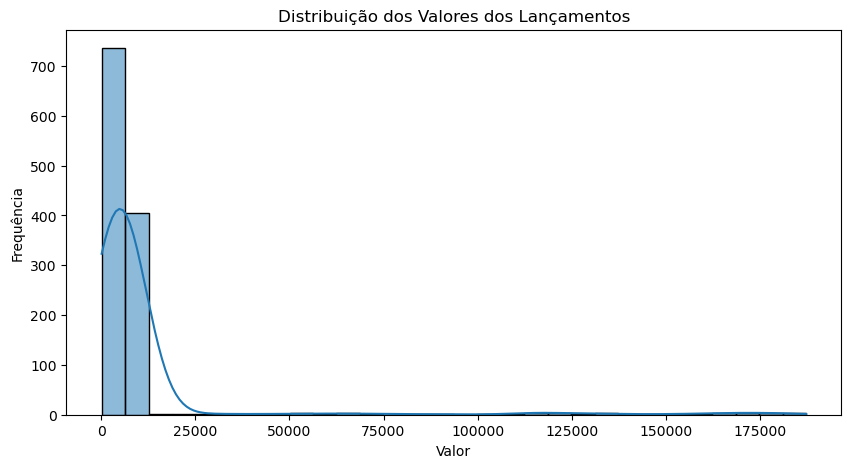

In [14]:
# Gráfico 1: Distribuição dos valores dos lançamentos
plt.figure(figsize=(10,5))
sns.histplot(df['valor'], kde=True, bins=30)
plt.title('Distribuição dos Valores dos Lançamentos')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.show()

Valores dos Lançamento ao Longo do Tempo: Um gráfico de linha que exibe como os valores dos lançamentos variam ao londo do tempo. Isso pode ajudar a identificar tendências e padrões sazonais nos dados.

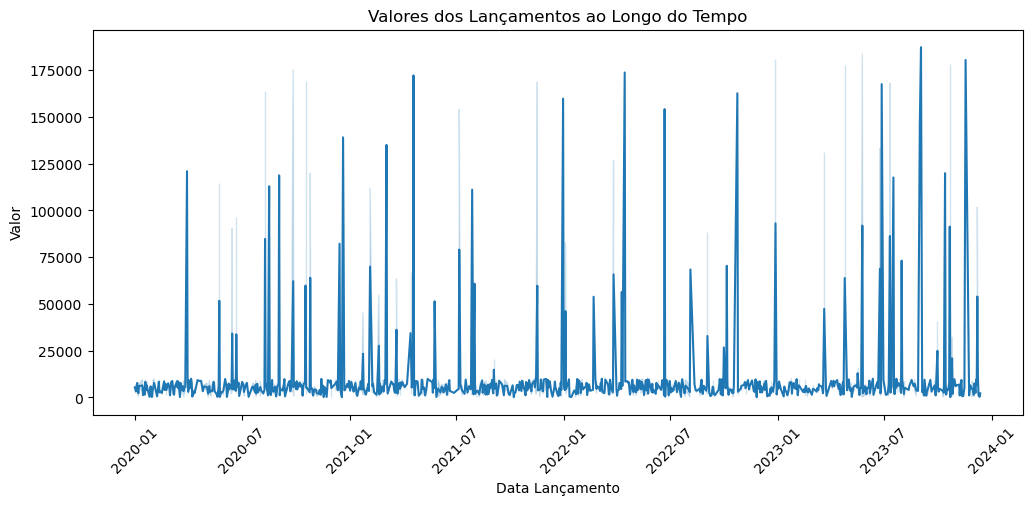

In [15]:
# Gráfico 2: Valores dos lançamentos ao longo do tempo variável 'data_lancamento' tipo datatime
plt.figure(figsize=(12,5))
# Convertendo a variável 'data_lancamento' para o tipo adequado 'datetime'.
df['data_lancamento'] = pd.to_datetime(df['data_lancamento'])
sns.lineplot(x = 'data_lancamento', y= 'valor', data = df)
plt.title('Valores dos Lançamentos ao Longo do Tempo')
plt.xlabel('Data Lançamento')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.show()

Boxplot dos Impostos: Este boxplot oferece uma visão sobre a distribuição dos valores dos impostos, destacando a mediana, quartis e possíveis outliers.

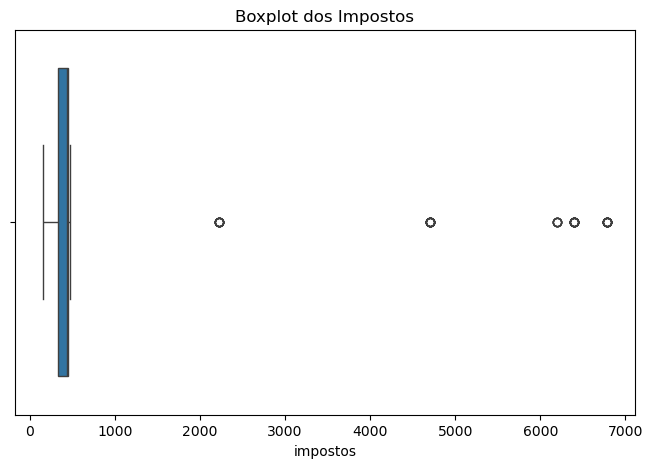

In [16]:
# Gráfico 3: Boxplot da variável 'impostos' tipo float
plt.figure(figsize=(8,5))
sns.boxplot(x = df['impostos'])
plt.title('Boxplot dos Impostos')
plt.show()

Contagem de Operações por moeda: Um gráfico de barras mostrando o número de operações realizadas em diferentes moedas. Isso pode ser útil para entender a predominância de certas moedas nas operações.

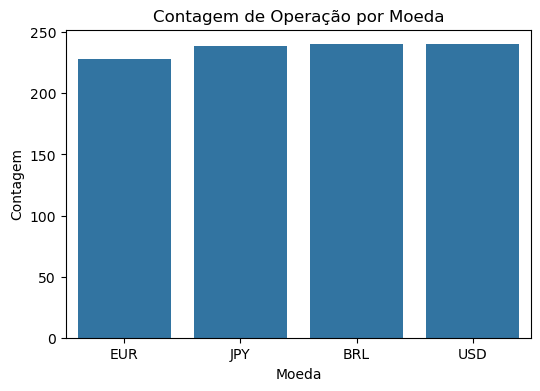

In [17]:
# Gráfico 4: Contagem de operações por moeda - variável moeda do tipo 'object' categórica
plt.figure(figsize=(6,4))
sns.countplot(x = 'moeda', data = df)
plt.title('Contagem de Operação por Moeda')
plt.xlabel('Moeda')
plt.ylabel('Contagem')
plt.show()

# O .countplot desconcidera valores ausentes na contagem.

## 1. Tratamento de Valores Ausentes

Para variáveis numéricas, como 'valor' ou 'impostos', uma abordagem comum é substituir os valores ausentes pela média ou a mediana da coluna.
A escolha entre média ou mediana geralmente depende da distribuição dos dados.

In [13]:
# Há valores ausentes na variável 'impostos'?
df['impostos'].isna().sum()

180

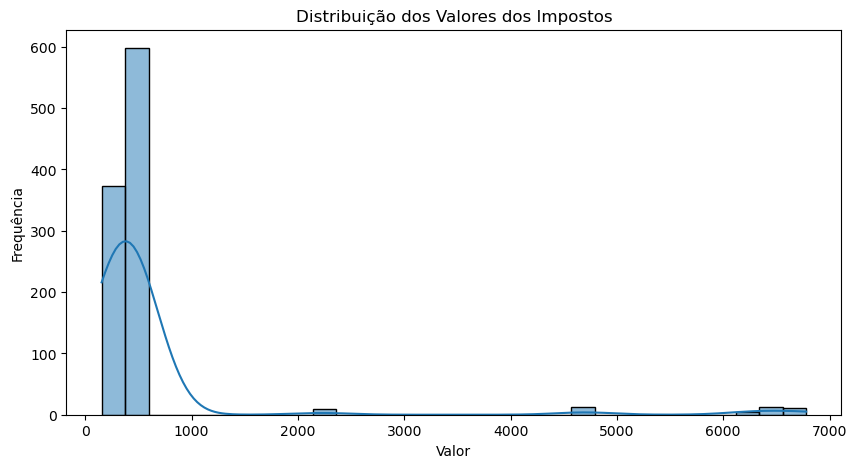

In [19]:
# Visualização da distribuição dos valores dos impostos
plt.figure(figsize=(10, 5))
sns.histplot(df['impostos'], kde= True, bins=30)
plt.title('Distribuição dos Valores dos Impostos')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.show()

In [14]:
# Qual a média da variável?
df['impostos'].mean()
# O valor da média é vulnerável a existência de outliers.

604.264545965864

In [15]:
# Qual a mediana da variável?
df['impostos'].median()
# O valor da mediana não é sensível a existência de outliers.

430.1553391717098

In [16]:
# Substituindo (imputando) valores ausentes em 'impostos' pela mediana
df['impostos'].fillna(df['impostos'].median(), inplace=True)

In [17]:
# Há valores ausentes após a imputação?
df['impostos'].isna().sum()

0

## 2. Tratamento de Valores Ausentes para Variável Categórica

Para variáveis categóricas, como 'moeda', podemos substituir os valores ausentes pelo valor mais frequênte (moda) ou categorizar com 'Desconhecido'.

In [18]:
# Há valores ausentes? Quantos?
df.isna().sum()

id                     0
data_lancamento        0
conta_debito           0
conta_credito          0
valor                  0
documento            122
natureza_operacao    120
centro_custo           0
impostos               0
moeda                253
taxa_conversao       218
dtype: int64

In [19]:
# Há valores ausentes na coluna moeda?
df['moeda'].isna().sum()

253

In [20]:
# Qual a moda? (valores categóricos que mais aparecem na coluna)
df['moeda'].mode()[0]

'BRL'

In [27]:
# Vamos substituir os valores ausentes pela moda da série dedos. Utilizaremos essa estratégia para seguir com o exercício.
# Valores ausentes são um problemas e DEVEM ser resolvidos.
df['moeda'].fillna(df['moeda'].mode()[0], inplace=True)

In [28]:
# Conferindo se existem valores ausentes na coluna 'moeda'
df['moeda'].isna().sum()

0

In [29]:
# Há valores ausentes?
df.isna().sum()

id                     0
data_lancamento        0
conta_debito           0
conta_credito          0
valor                  0
documento            122
natureza_operacao    120
centro_custo           0
impostos               0
moeda                  0
taxa_conversao       218
dtype: int64

In [21]:
# Recalculando a soma dos valores ausentes por coluna
valores_ausentes = df.isna().sum()
# Recalculando o número total de linhas
total_linhas = len(df)
# Recalculando a proporção de valores ausentes por coluna
proporcao_valores_ausentes = valores_ausentes / total_linhas
# Reexibindo a proporção de valores ausentes
print(proporcao_valores_ausentes)

id                   0.000000
data_lancamento      0.000000
conta_debito         0.000000
conta_credito        0.000000
valor                0.000000
documento            0.101667
natureza_operacao    0.100000
centro_custo         0.000000
impostos             0.000000
moeda                0.210833
taxa_conversao       0.181667
dtype: float64


In [22]:
# Preechendo os valores ausentes em 'taxa_conversao' com a categoria 'Outro'
df['taxa_conversao'].fillna('Outro', inplace = True)

In [23]:
# Preenchiento os valores ausentes em 'documento' com a categoria 'Outro'
df['documento'].fillna('Outro', inplace=True)

In [24]:
# Preechendo os valores ausentes em 'natureza_operacao' com bfill
# Este médoto preenche cada valor ausentes com o valor imediatamente posterior na mesma coluna (andamos para trás)
df['natureza_operacao'].fillna(method= 'bfill', inplace = True)

## 3. Tratamento de Valores Ausentes Quando não Aparentam ser Valores Ausentes
Às vezes, os valores ausentes podem estar disfarçados com marcadores como 'N/A', '?', 'Desconhecido', ou até '0' em contexto onde '0' não é um valor válido. Identifique esses casos e trate-os como valores ausentes.

In [25]:
# Verificando se há o caracter '?' na coluna conta_credito (1º método)
tem_valor_pergunta = df['conta_credito'].isin(['?']).any()
print(tem_valor_pergunta)

True


In [26]:
# Contando a frequÊncia de cada valor na coluna (Método 2)
contagem_valores = df['conta_credito'].value_counts()
# Verificando se '?' está na contagem e obtendo seu número de ocorrências
numero_ocorrencias_pergunta = contagem_valores.get('?', 0)
# Imprime o número de ocorrência de '?'
print(numero_ocorrencias_pergunta)

4


In [28]:
# Identificar colunas categóricas (Método 3)
colunas_categoricas = df.select_dtypes(include=['object', 'category']).columns
# .columns retorna uma lista com o título das colunas

# Verificar a presença do valor "?" em cada coluna cotegórica
for coluna in colunas_categoricas:
    tem_valor_pergunta = df[coluna].isin(['?']).any()
    print(f"A coluna '{coluna}' contém '?' ? {tem_valor_pergunta}")

A coluna 'data_lancamento' contém '?' ? False
A coluna 'conta_debito' contém '?' ? False
A coluna 'conta_credito' contém '?' ? True
A coluna 'documento' contém '?' ? False
A coluna 'natureza_operacao' contém '?' ? False
A coluna 'centro_custo' contém '?' ? False
A coluna 'moeda' contém '?' ? False
A coluna 'taxa_conversao' contém '?' ? False


In [29]:
# Substituindo '?' por NaN e depois preechendo os valores ausentes
df['conta_credito'].replace('?', np.nan, inplace=True)
# Este método preenche cada valor ausente com o valor imediatamente anterior na mesma coluna (andamos par frente)
df['conta_credito'].fillna(method = 'ffill', inplace=True)

In [30]:
# Há valores ausentes na coluna 'conta_credito'?
df['conta_credito'].isna().sum()

0

In [31]:
# Há valores ausentes no df?
df.isna().sum()

id                     0
data_lancamento        0
conta_debito           0
conta_credito          0
valor                  0
documento              0
natureza_operacao      0
centro_custo           0
impostos               0
moeda                253
taxa_conversao         0
dtype: int64

## Tratamento de Outliers
Aplicando o tratamento do outliers nas variáveis "valor" e "impostos". Uma questão importante é entender com a determinada área a importância do outleir. Eles devem ser retirados da base? Para cada decisão, a área responsável deve ser consultada. Se não for possível, justifique a escolha de a decisão.

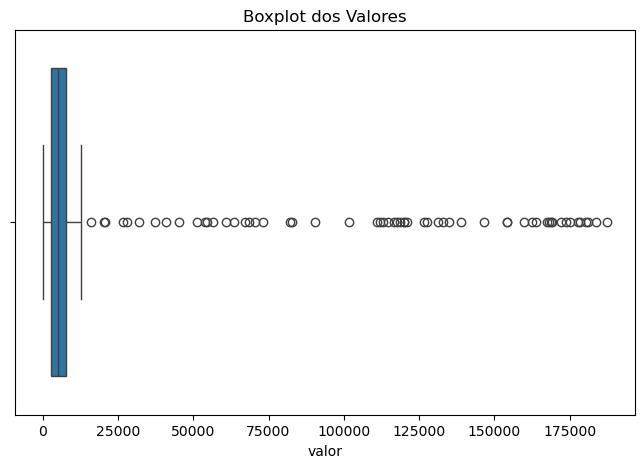

In [40]:
# Boxplot dos valores de lançamento
plt.figure(figsize=(8,5))
sns.boxplot(x=df['valor'])
plt.title('Boxplot dos Valores')
plt.show()

In [32]:
# Tratamento de outliers na variável valor
# Consideramos que a área responsável pelo DataFrame sinalizou que os outliers são ruídos e devem ser excluídos.

# Calculando Q1 e Q3
Q1 = df['valor'].quantile(0.25)
Q3 = df['valor'].quantile(0.75)

# Calculando IQR
IQR = Q3 - Q1

# Definindo limites para determinar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrando os outliers
df_filtro_1 = df[~((df['valor'] < limite_inferior) | (df['valor'] > limite_superior))] 

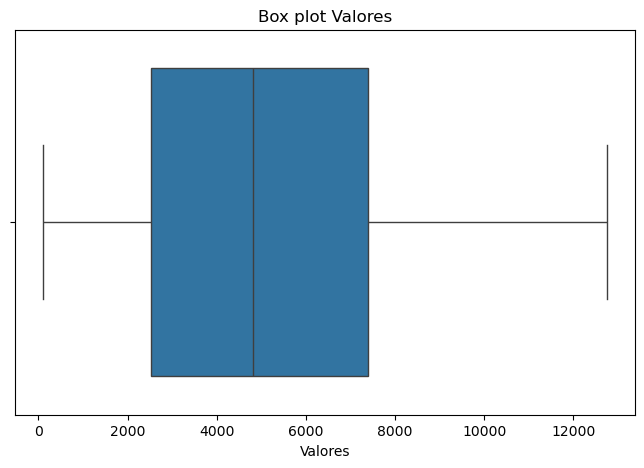

In [42]:
# Boxplot dos valores de lançamento
plt.figure(figsize=(8,5))
sns.boxplot(x=df_filtro_1['valor'])
plt.title('Box plot Valores')
plt.xlabel('Valores')
plt.show()

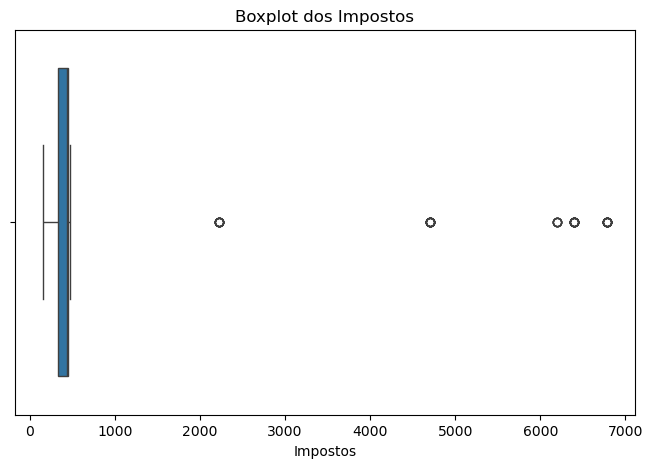

In [43]:
# Boxplot dos impostos
plt.figure(figsize=(8,5))
sns.boxplot(x = df['impostos'])
plt.title('Boxplot dos Impostos')
plt.xlabel('Impostos')
plt.show()

In [33]:
# Aplicando a mesma regra para criar um novo DataFrame sem outliers
# Tratamento de outliers da variável 'impostos'


# Calculando Q1 e Q2
Q1 = df['impostos'].quantile(0.25)
Q3 = df['impostos'].quantile(0.75)

# Calculando IQR
IQR = Q3 - Q1

# Definindo limites para determinar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrando os outliers
df_filtro_2 = df_filtro_1[~((df_filtro_1['impostos'] < limite_inferior) | (df_filtro_1['impostos'] > limite_superior))]

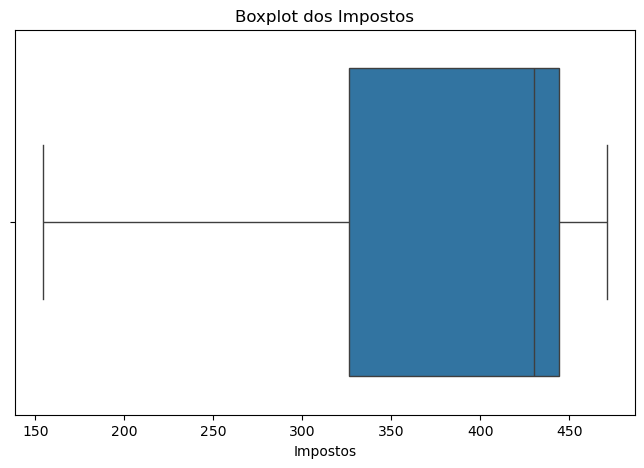

In [45]:
# Box plot dos impostos
plt.figure(figsize=(8,5))
sns.boxplot(x = df_filtro_2['impostos'])
plt.title('Boxplot dos Impostos')
plt.xlabel('Impostos')
plt.show()

## Análise Exploratória Depois da Limpeza
### Análise Exploratória Univariáda (Olhando para uma variável especificamente)

In [46]:
df_filtro_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1097 entries, 0 to 1199
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 1097 non-null   int64         
 1   data_lancamento    1097 non-null   datetime64[ns]
 2   conta_debito       1097 non-null   object        
 3   conta_credito      1097 non-null   object        
 4   valor              1097 non-null   float64       
 5   documento          1097 non-null   object        
 6   natureza_operacao  1097 non-null   object        
 7   centro_custo       1097 non-null   object        
 8   impostos           1097 non-null   float64       
 9   moeda              1097 non-null   object        
 10  taxa_conversao     1097 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 102.8+ KB


### Análisando e Interpretando Histograma

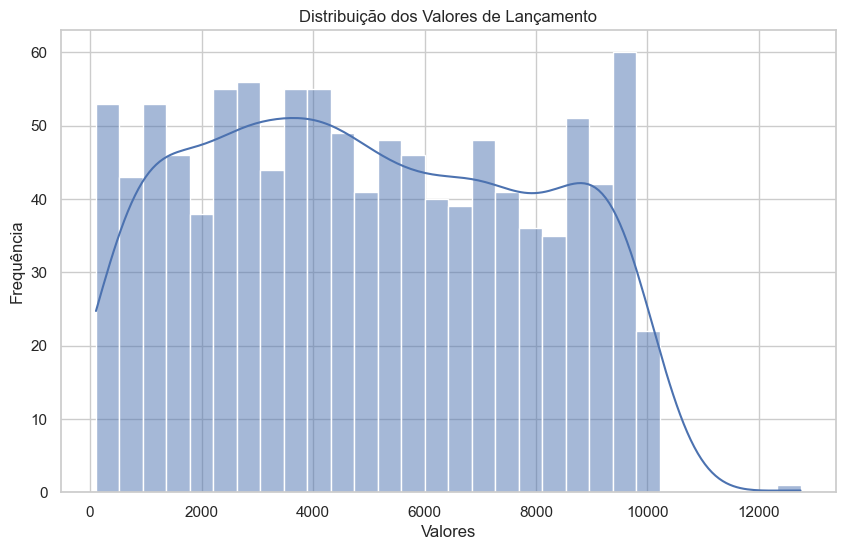

In [47]:
# Configurando o estilo do seaborn
sns.set(style= "whitegrid")

# Criando o histograma para a coluna 'valor'
plt.figure(figsize=(10, 6))
sns.histplot(df_filtro_2['valor'], kde= True, bins=30)
plt.title('Distribuição dos Valores de Lançamento')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()

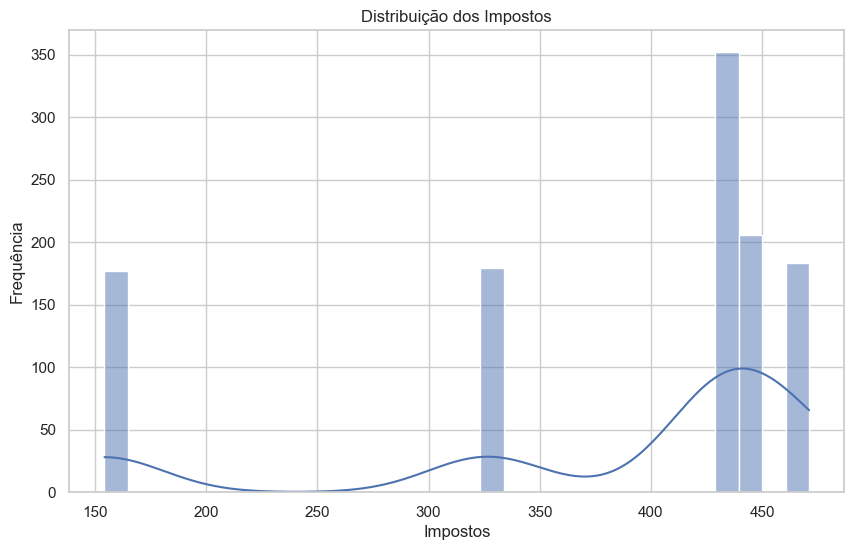

In [48]:
# Configurando o estilo do Seaborn
sns.set_style("whitegrid") # outra forma de definição de stilo para o seaborn

# Criando o histograma para a coluna 'impostos'
plt.figure(figsize=(10, 6))
sns.histplot(df_filtro_2['impostos'], kde=True, bins=30)
plt.title('Distribuição dos Impostos')
plt.xlabel('Impostos')
plt.ylabel('Frequência')
plt.show()

#### Interpretação do Histograma

Interpretar um histrograma é fundamental para compreender a distribuição dos dados. Um histograma é um gráfico que mostra a frequência com que os valores de um conjunto de dados ocorrem dentro de intervalos específicos de dados ou 'bins'. Aqui estão os passos para interpretá-lo:

#### Observar a Forma Geral

A forma do histograma pode revelar muito sobre a natureza dos dados.

Distribuição simétrica: Se o gráfico é simétrico em torno de um valor central, indica uma distribuição normal o quase normal.

Distribuição assimétrica: Se a cauda do gráfico se estende mais para a esquerda ou direita, indica uma assimetria (skewness). Para a esquerda é assimetria negativa; para a direita é assimetria positiva.

In [49]:
from scipy.stats import skew

In [50]:
# Calculando a assimetria (skewness)
skewness = skew(df_filtro_2['valor'])
print(f"A assimetria da distribuição dos valores é: {skewness}")

A assimetria da distribuição dos valores é: 0.09784439352386005


In [53]:
# Calculando a assimetria (Skewness)
skewness = skew(df_filtro_2['impostos'])
print(f"A assimetria da distribuição dos impostos é: {skewness}")

A assimetria da distribuição dos impostos é: -1.2735246899435217


- um valor de assimetria de zero sugere que a distribuição é perfeitamente simétrica.
- um valor de assimetria positiva indica uma distribuição com cauda mais pesada para a direita.
- um valor de assimetria negativa indica uma distribuição com cauda mais pesada para a esquerda.

### 2. Identifique Picos e Vales

Presença de multiplos pisos: Isso pode indicar que os dados tem múltiplos grupos ou modas.

Picos (Modas): Os pontos mais altos dos histogramas são as modas, indicando os valores mais comuns nos dados.
Vales: São as áreas entre picos, que podem indicar uma separação entre diferentes grupos nos dados.

### 3. Verifique a Largura dos Bins

A largura dos intervalos (bins) pode afetar a aparência do histograma. Bins muito largos podem esconder detalhes importantes, enquanto bins muito estreitos podem mostrar muita variação aleatória.

### 4. Observe Outliers

Os outliers podem aparecer com barras isoladas distantes do resto dos dados, indicando valores atípicos.

### 5. Análise o Eixo X e Y

- Eixo X (horizontal): Mostra os intervalos de valores dos dados.
- Eixo Y (vertical): Mostra a frequência ou contagem de ocorrências em cada bin.

### Analisando e Interpretando Boxplot

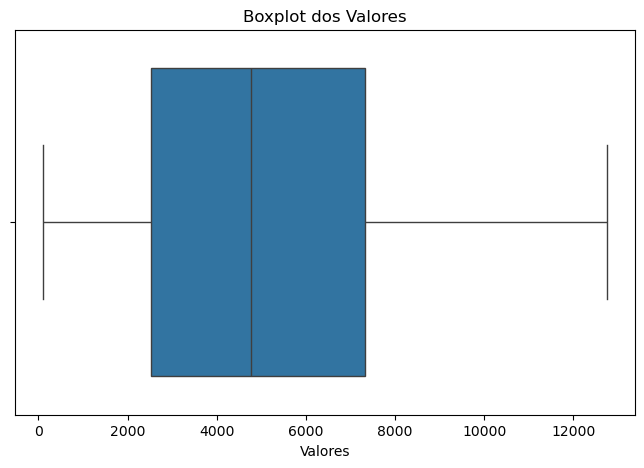

In [34]:
# Boxplot dos valores
plt.figure(figsize=(8,5))
sns.boxplot(x = df_filtro_2['valor'])
plt.title('Boxplot dos Valores')
plt.xlabel('Valores')
plt.show()

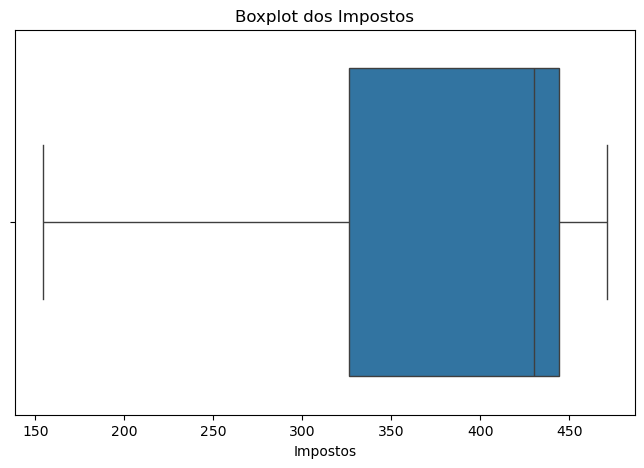

In [37]:
# Boxplot dos impostos
plt.figure(figsize=(8,5))
sns.boxplot(x=df_filtro_2['impostos'])
plt.title('Boxplot dos Impostos')
plt.xlabel('Impostos')
plt.show()

#### Interpretação do Boxplot:

Interpretar um boxplot, também conhecido como diagrama de caixa, é essencial para entender a distribuição, a centralidade e a dispesão dos dados. O boxplot oferece uma representação visual concisa que destaca os quartis e os valores atípicos (outliers) dos dados. Aqui estão os componestes principais de um boxplot e como interpretá-los:
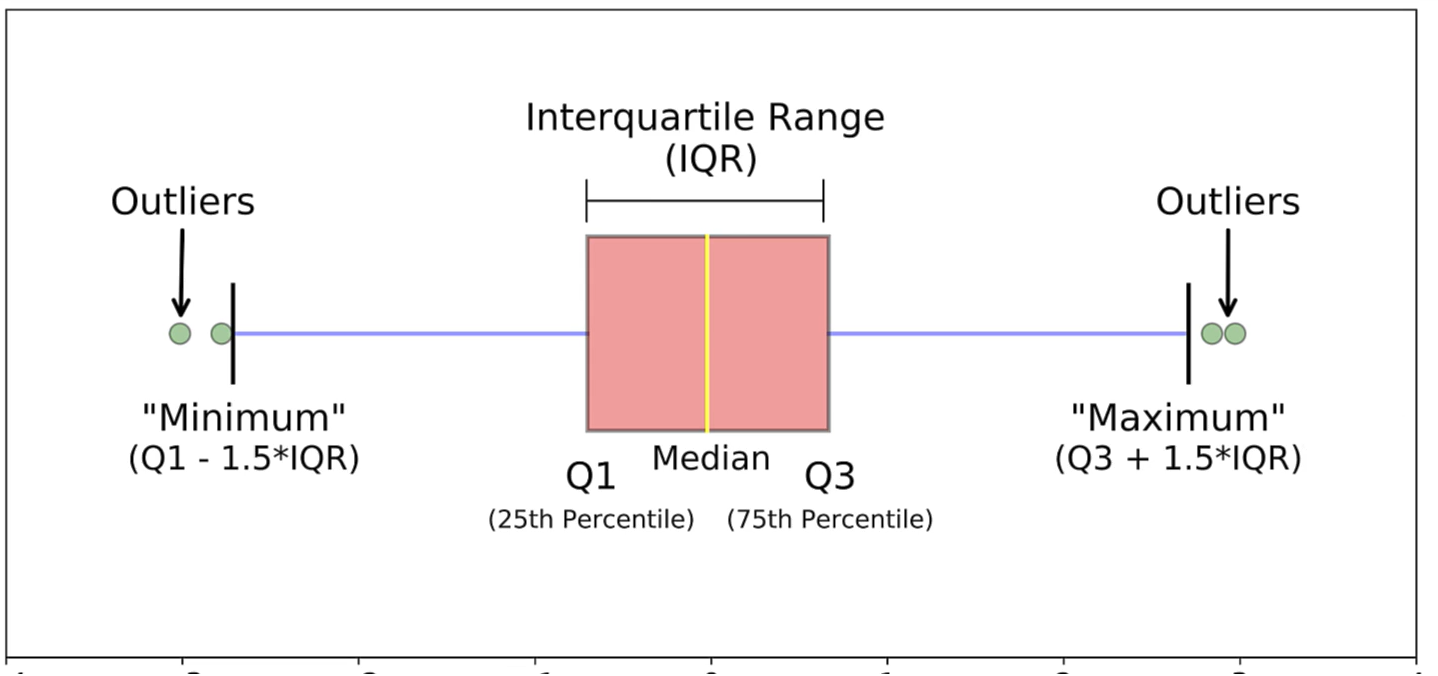

#### 1. Quartis

O boxplot é divido em quartis:

 - Q1 (Primeiro Quartil): Representa o valor abaixo do qual 25% dos dados se encontram.
 - Q2 (Mediana): Divide os dados ao meio - 50% dos dados estão abaixo e 50% estão acima dela.
 - Q3 (Terceiro Quartil): Representa o valor abaixo do qual 75% dos dados se encontram.

#### 2. Intervalo Interquartil (IQR)

IQR: A distância entre Q1 e Q3. Representa a amplitude dos 50% centrais dos dados. Um IQR maior indica maior dispersão.

#### 3. Bigodes (Whiskers)

Os "bigodes" estendem-se do Q1 e Q3 para mostrar a variação fora do meio 50%. Normalmente, eles se estendem até 1.5*IQR acima de Q3 e abaixo de Q1.

Dados fora do bigode podem ser considerados atípicos ou potenciais outliers.

#### 4. Outliers

Outliers: São pontos de dados que caem fora dos bigodes. Eles são frequentimente representados por pontos ou círculos individuais no gráfico.

#### 5. Simetria

Se a mediana está no centro da caixa eos bigode têm comprimento semelhantes, os dados são mais simétricos.

Se a mediana está mais próxima de Q1 ou Q3, ou se um bigode é significativamente mais longo que o outro, os dados são assimétricos.

Uma caixa mais longa indica maior variabilidade nos dados centrais. A presença de outliers pode indicar variações externas ou probleams com os dados.

### Análise Exploratória Multivariada

Analisando e Interpretando Mapas de Correlação

In [ ]:
# Convertendo 'data_lancamento' para datetime
df_filtro_2['data_lancamento'] = pd.to_datetime(df_filtro_2['data_lancamento'])

# Criando uma nova coluna que representa o número de dias deste a data mais antiga
min_date = df_filtro_2['data_lancamento'].min()
df_filtro_2['dias_desde_lancamento'] = (df_filtro_2['data_lancamento'] - min_date).dt.days

In [41]:
df_filtro_2.head()

,id,data_lancamento,conta_debito,conta_credito,valor,documento,natureza_operacao,centro_custo,impostos,moeda,taxa_conversao,dias_desde_lancamento
0,1,2022-02-27,DWAVRL,CIOVQ6,5533.25,DOCPAXGQ,OP7JDVK,CC5FYA2,444.13252,NaN,3.475606,788
1,2,2022-05-11,D8TF53,CV9Y0V,7180.37,DOCBXZXG,OPXSY64,CCLH4R9,471.09236,EUR,3.523287,861
2,3,2020-03-23,D0TZCE,CELQSH,6067.36,DOCF5ITC,OPTDE9B,CCDG8CJ,326.49988,JPY,3.523287,82
3,4,2021-06-14,DOGLK7,CDFEMS,5494.34,DOCZRS1U,OP62LG1,CC98G2K,471.09236,JPY,3.523287,530
4,5,2022-11-13,DHL0I5,CRU97G,4294.18,Outro,OP62LG1,CCZD80Y,154.26398,EUR,3.523287,1047


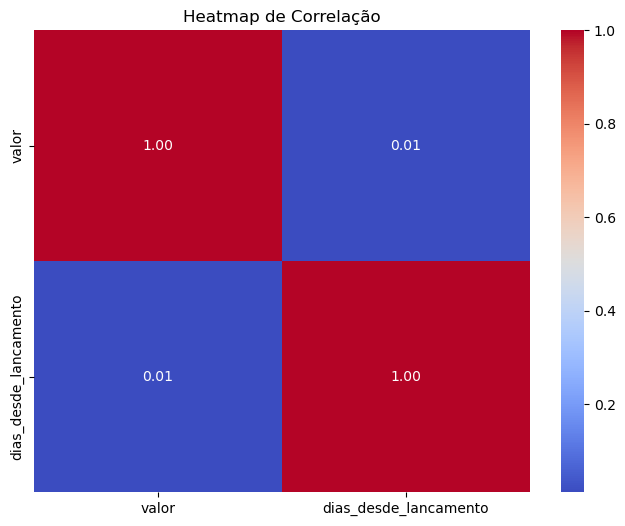

In [39]:
# Calculando a correlação entre 'valor' e 'dias_desde_lancamento'
correlacao_matrix = df_filtro_2[['valor', 'dias_desde_lancamento']].corr()

# Criando o heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlacao_matrix, annot = True, cmap = 'coolwarm', fmt= ".2f")
plt.title ("Heatmap de Correlação")
plt.show()

O mapa de correlação (ou heatmap) é uma ferramente visual utilizada para representar a força e a direção da correlação entre duas ou mais variáveis. Aqui está como interpretá-lo:

**Valores na Matriz**

Cada célula na matriz mostra o coeficiente de corelação entre duas variáveis. O coeficiênte de correlação varia de -1 a 1.

 - 1 indica uma correlação positiva perfeita (quando uma variável aumenta, a outra também aumenta).
 - -1 indica uma correlação negativa perfeita (quando uma variável aumenta, a outra diminui).
 - 0 indica nenhuma correlação (as variáveis não têm relação linear).

**Cores**

As cores representam a força da correlação, geralmente seguindo um gradiente de cores.

**Interpretação**

 - Correlação Positiva Forte (valores próximos a 1): Quando uma variável aumenta, a outra tende a aumentar também. Por exemplo, em dados de vendas, pode haver uma correlação positiva forte entre gastos em publicidade e a receita.
 - Correlação Negativa Forte (valores próximo a -1): Quando uma variável aumenta, a outra tende a diminuir. Por exemplo, em dados de saúde, pode haver uma correlação negativa forte entre a quantidade de exercícios e o peso corporal.
 - Correlação Fraca ou Inexistente (valores próximos a 0): As variáveis não tem uma relação linear clara. Uma variável não fornece informações confiáveis sobre a outra.

**Considerações:**

Correlação **Não Implica Causalidade**. Mesmo se duas variáceis estão fortemente correlacionadas, isso não significa que uma causa a outra. Outras fatores influenciar as variáveis. Por isso, análises mais profundas, como a análise de causalidade, podem ser necessárias para compreender as relações entre as variáveis.

Ao analisar o heatmap de correlação entre 'valor' e 'dias_desde_lancamento', você observa o grau em que essas duas variáveis se movem juntas e pode usar essa informação para compreender melhor as tendências e padrões nos seus dados.

#### **Analisando e Interpretando Gráficos de Dispersão**